In [1]:
import os

# Folder containing your CSV file
folder_path = r"C:\Users\shivani\Downloads\data-science-datasets-main\data-science-datasets-main\Task 1"

# List all CSV files in the folder
for f in os.listdir(folder_path):
    if f.endswith(".csv"):
        print(f)



API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv
Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv


In [2]:
import pandas as pd

file_path = r"C:\Users\shivani\Downloads\data-science-datasets-main\data-science-datasets-main\Task 1\API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv"

# Skip first 4 rows (adjust if needed)
df = pd.read_csv(file_path, skiprows=4)
print(df.head())


                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0      58190.0  .

In [3]:
# View the first 5 rows
print(df.head())

# Get summary info
print(df.info())

# Check column names
print(df.columns)

# Quick stats for numeric columns
print(df.describe())


                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0      58190.0  .

In [4]:
# Keep only 'Country Name' and population columns (1960 onwards)
population_df = df[['Country Name'] + list(df.columns[4:])]
print(population_df.head())


                  Country Name         1960         1961         1962  \
0                        Aruba      54922.0      55578.0      56320.0   
1  Africa Eastern and Southern  130075728.0  133534923.0  137171659.0   
2                  Afghanistan    9035043.0    9214083.0    9404406.0   
3   Africa Western and Central   97630925.0   99706674.0  101854756.0   
4                       Angola    5231654.0    5301583.0    5354310.0   

          1963         1964         1965         1966         1967  \
0      57002.0      57619.0      58190.0      58694.0      58990.0   
1  140945536.0  144904094.0  149033472.0  153281203.0  157704381.0   
2    9604487.0    9814318.0   10036008.0   10266395.0   10505959.0   
3  104089175.0  106388440.0  108772632.0  111246953.0  113795019.0   
4    5408320.0    5464187.0    5521981.0    5581386.0    5641807.0   

          1968  ...         2016         2017         2018         2019  \
0      59069.0  ...     108727.0     108735.0     108908.0     10

In [5]:
india = population_df[population_df['Country Name'] == 'India']
print(india.T)  # Transpose to see years as rows


                       109
Country Name         India
1960           435990338.0
1961           446564729.0
1962           457283090.0
1963           468138575.0
...                    ...
2021          1414203896.0
2022          1425423212.0
2023          1438069596.0
2024          1450935791.0
Unnamed: 69            NaN

[67 rows x 1 columns]


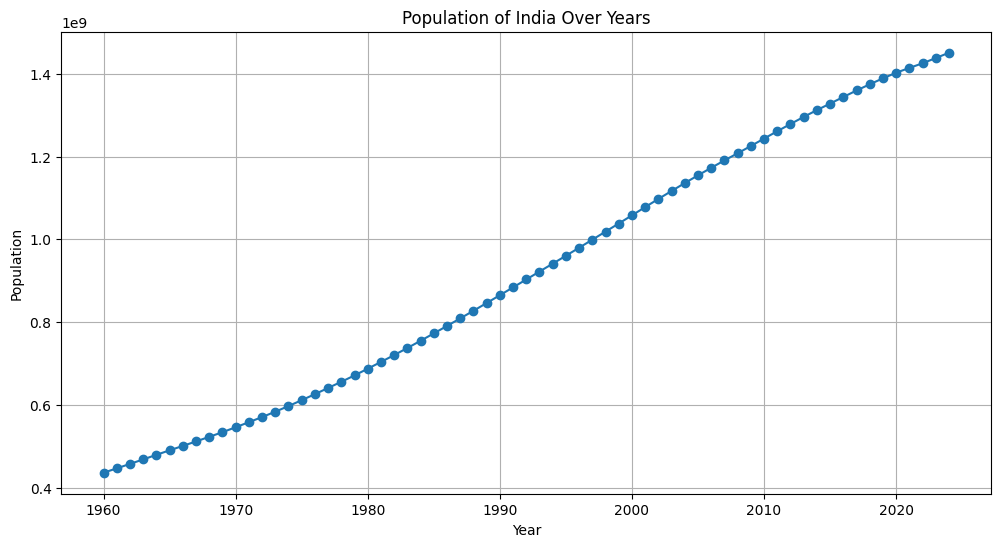

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Select India row
india = population_df[population_df['Country Name'] == 'India']

# Drop 'Country Name' and non-year columns
india_data = india.drop(columns=['Country Name'])

# Keep only columns that are numeric years
year_columns = [col for col in india_data.columns if col.isdigit()]
india_data = india_data[year_columns]

# Transpose to get years as index
india_data = india_data.T
india_data.columns = ['Population']

# Convert index to int
india_data.index = india_data.index.astype(int)

# Convert population to numeric (sometimes read as string)
india_data['Population'] = pd.to_numeric(india_data['Population'], errors='coerce')

# Plot
plt.figure(figsize=(12,6))
plt.plot(india_data.index, india_data['Population'], marker='o')
plt.title('Population of India Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()


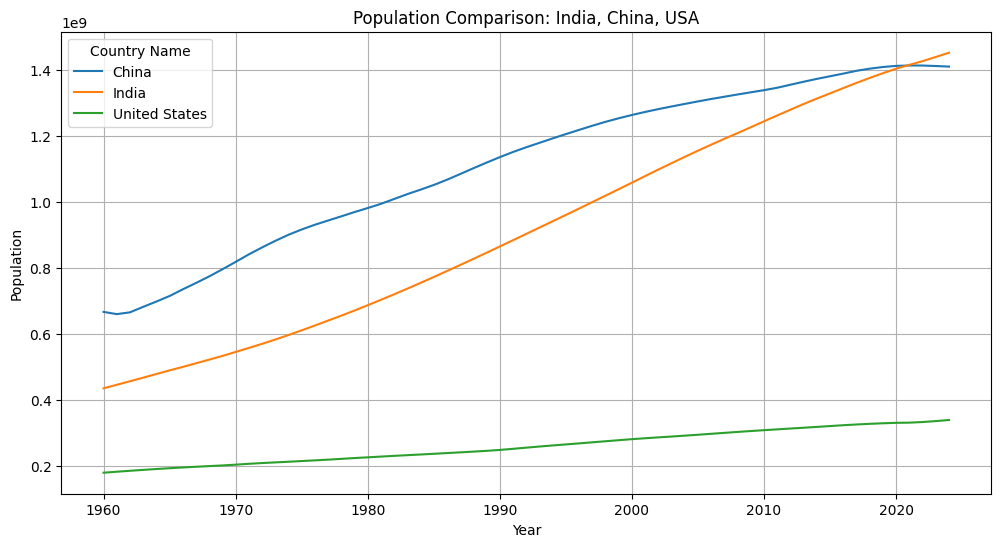

In [7]:
# List of countries to compare
countries = ['India', 'China', 'United States']

# Filter the rows
subset = population_df[population_df['Country Name'].isin(countries)]

# Keep only year columns
year_columns = [col for col in subset.columns if col.isdigit()]
subset = subset[['Country Name'] + year_columns]

# Transpose to have years as index
subset = subset.set_index('Country Name').T
subset.index = subset.index.astype(int)

# Convert all values to numeric
subset = subset.apply(pd.to_numeric, errors='coerce')

# Plot
subset.plot(figsize=(12,6))
plt.title('Population Comparison: India, China, USA')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()


In [8]:
india_max_year = india_data['Population'].idxmax()
india_max_pop = india_data['Population'].max()

print(f"India had the maximum population of {india_max_pop} in {india_max_year}")


India had the maximum population of 1450935791.0 in 2024


In [9]:
india_data['Growth Rate (%)'] = india_data['Population'].pct_change() * 100


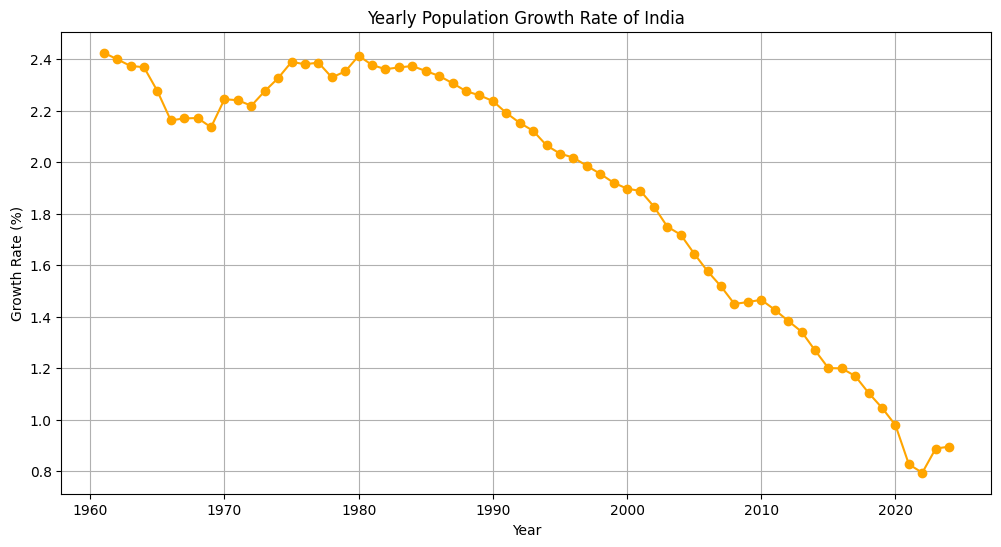

In [16]:
import matplotlib.pyplot as plt

# 1️⃣ Calculate Growth Rate
india_data['Growth Rate (%)'] = india_data['Population'].pct_change() * 100

# 2️⃣ Plot Growth Rate
plt.figure(figsize=(12,6))
plt.plot(india_data.index, india_data['Growth Rate (%)'], marker='o', color='orange')
plt.title('Yearly Population Growth Rate of India')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


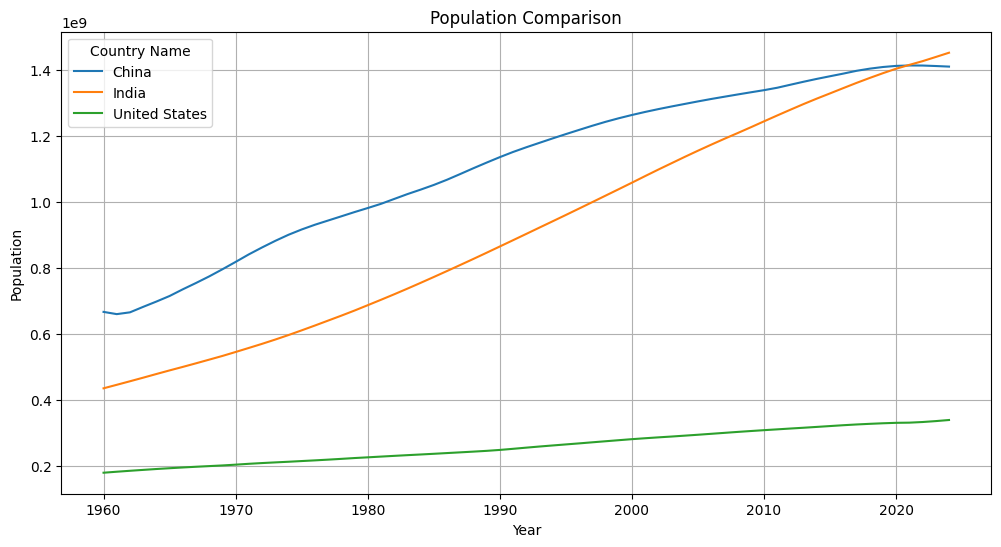

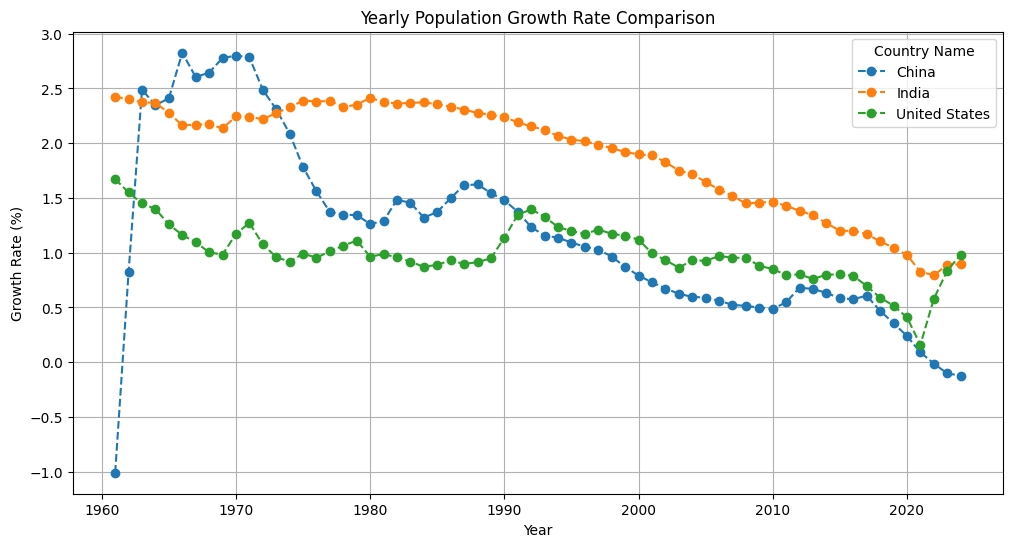

In [17]:
# List of countries
countries = ['India', 'China', 'United States']

# Filter rows
subset = population_df[population_df['Country Name'].isin(countries)]

# Keep only numeric year columns
year_columns = [col for col in subset.columns if col.isdigit()]
subset = subset[['Country Name'] + year_columns]

# Transpose to have years as index
subset = subset.set_index('Country Name').T
subset.index = subset.index.astype(int)

# Convert all values to numeric
subset = subset.apply(pd.to_numeric, errors='coerce')

# Compute yearly growth rate for each country
growth_rate = subset.pct_change() * 100

# Plot population
subset.plot(figsize=(12,6))
plt.title('Population Comparison')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()

# Plot growth rate
growth_rate.plot(figsize=(12,6), linestyle='--', marker='o')
plt.title('Yearly Population Growth Rate Comparison')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


In [18]:
for country in countries:
    max_year = subset[country].idxmax()
    max_pop = subset[country].max()
    min_year = subset[country].idxmin()
    min_pop = subset[country].min()
    print(f"{country}: Max Population {max_pop} in {max_year}, Min Population {min_pop} in {min_year}")


India: Max Population 1450935791.0 in 2024, Min Population 435990338.0 in 1960
China: Max Population 1412360000.0 in 2021, Min Population 660330000.0 in 1961
United States: Max Population 340110988.0 in 2024, Min Population 180671000.0 in 1960


In [19]:
subset.to_csv(r"C:\Users\shivani\Downloads\Population_comparison.csv")
growth_rate.to_csv(r"C:\Users\shivani\Downloads\Population_growth_rate.csv")


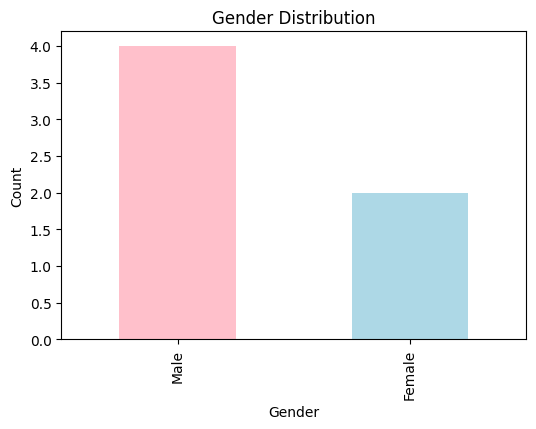

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male']
}

df = pd.DataFrame(data)

# Count frequency of each category
gender_counts = df['Gender'].value_counts()

# Bar chart
plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


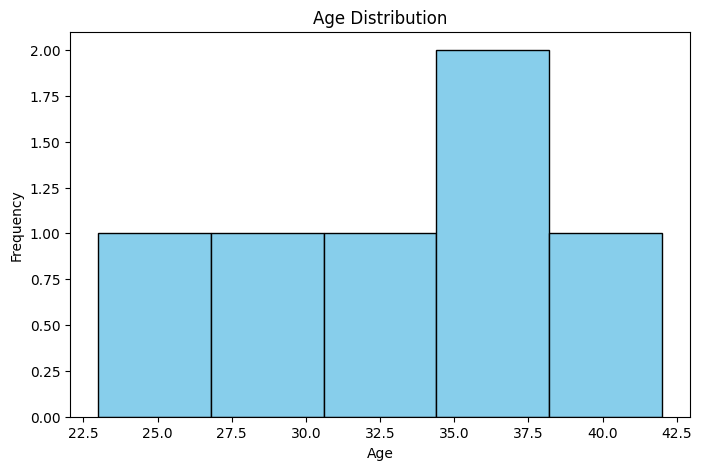

In [21]:
# Sample data
df['Age'] = [23, 35, 31, 29, 42, 37]

# Histogram
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
📊 Task 1 Completed: Successfully visualized the distribution of age and gender, gaining practical exposure to the basics of data visualization.
hashtag#ProdigyInfoTech